In [43]:
import numpy as np

X_train = []
X_test = []
y_train_high_snr = []
y_train_low_snr = []
y_test_high_snr = []
y_test_low_snr = []

with open('X_train.txt', 'r') as file:
    first_line = True
    for line in file:
        line = line.strip().split(' ')
        if first_line != True:
            for i in range(len(line)):
                line[i] = float(line[i])
            X_train.append(line)
        first_line = False

with open('X_test.txt', 'r') as file:
    first_line = True
    for line in file:
        line = line.strip().split(' ')
        if first_line != True:
            for i in range(len(line)):
                line[i] = float(line[i])
            X_test.append(line)
        first_line = False

with open('y_train_high_snr.txt', 'r') as file:
    first_line = True
    for line in file:
        line = line.strip()
        if first_line != True:
            y_train_high_snr.append(float(line))
        first_line = False
        
with open('y_train_low_snr.txt', 'r') as file:
    first_line = True
    for line in file:
        line = line.strip()
        if first_line != True:
            y_train_low_snr.append(float(line))
        first_line = False
        
with open('y_test_high_snr.txt', 'r') as file:
    first_line = True
    for line in file:
        line = line.strip()
        if first_line != True:
            y_test_high_snr.append(float(line))
        first_line = False
        
with open('y_test_low_snr.txt', 'r') as file:
    first_line = True
    for line in file:
        line = line.strip()
        if first_line != True:
            y_test_low_snr.append(float(line))
        first_line = False

X_train = np.array(X_train, dtype = 'float64')
X_test = np.array(X_test, dtype = 'float64')
y_train_high_snr = np.array(y_train_high_snr, dtype = 'float64')
y_train_low_snr = np.array(y_train_low_snr, dtype = 'float64')
y_test_high_snr = np.array(y_test_high_snr, dtype = 'float64')
y_test_low_snr = np.array(y_test_low_snr, dtype = 'float64')

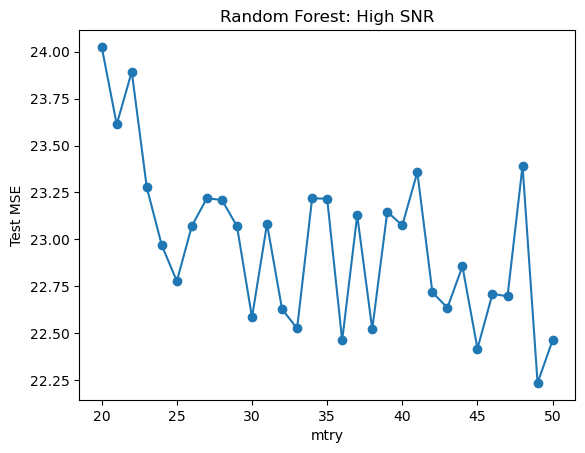

In [44]:
## High SNR

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

error_history = []

for mtry in range(20, 51):
    regr = RandomForestRegressor(max_features = mtry)
    regr.fit(X_train, y_train_high_snr)
    y_hat = regr.predict(X_test)
    error_history.append(np.mean(np.square(y_test_high_snr - y_hat)))

plt.plot(range(20, 51), error_history, '-o')
plt.title('Random Forest: High SNR')
plt.ylabel('Test MSE')
plt.xlabel('mtry')
plt.show()

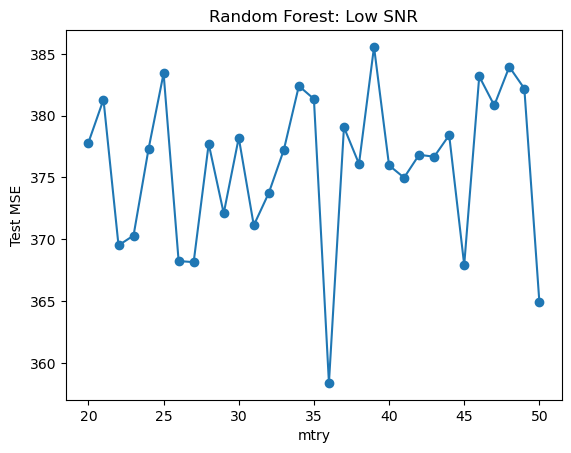

In [45]:
## Low SNR

from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

error_history = []

for mtry in range(20, 51):
    regr = RandomForestRegressor(max_features = mtry)
    regr.fit(X_train, y_train_low_snr)
    y_hat = regr.predict(X_test)
    error_history.append(np.mean(np.square(y_test_low_snr - y_hat)))

plt.plot(range(20, 51), error_history, '-o')
plt.title('Random Forest: Low SNR')
plt.ylabel('Test MSE')
plt.xlabel('mtry')
plt.show()

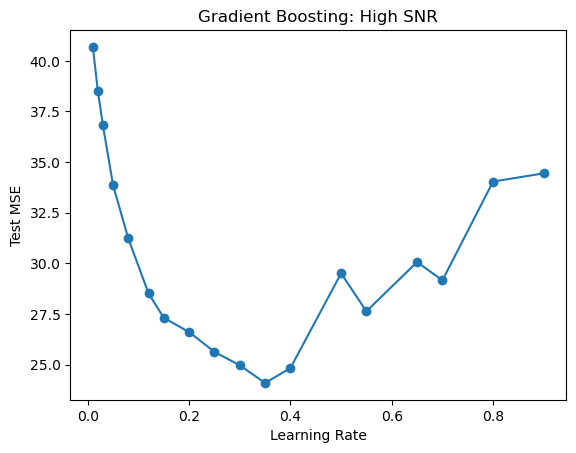

In [46]:
## High SNR

import xgboost as xgb

learning_rates = [0.01, 0.02, 0.03, 0.05, 0.08, 0.12, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55, 0.65, 0.7, 0.8, 0.9]
error_history = []
dtrain = xgb.DMatrix(X_train, label = y_train_high_snr)
dtest = xgb.DMatrix(X_test)

for lr in learning_rates:
    param = {'learning_rate': lr}
    num_round = 10
    bst = xgb.train(param, dtrain, num_round)
    
    ypred = bst.predict(dtest)
    error_history.append(np.mean(np.square(y_test_high_snr - ypred)))

plt.plot(learning_rates, error_history, '-o')
plt.title('Gradient Boosting: High SNR')
plt.ylabel('Test MSE')
plt.xlabel('Learning Rate')
plt.show()

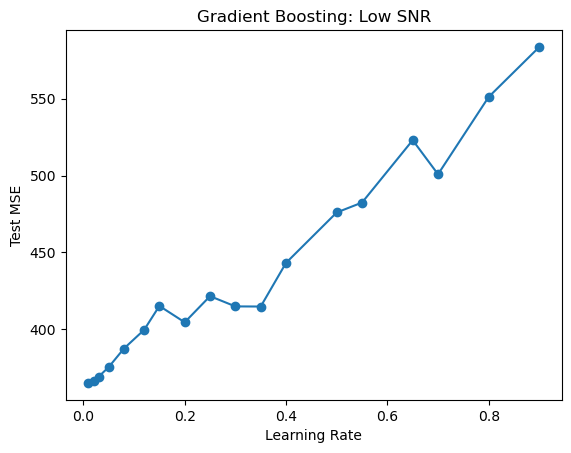

In [47]:
## Low SNR

import xgboost as xgb

learning_rates = [0.01, 0.02, 0.03, 0.05, 0.08, 0.12, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.5, 0.55, 0.65, 0.7, 0.8, 0.9]
error_history = []
dtrain = xgb.DMatrix(X_train, label = y_train_low_snr)
dtest = xgb.DMatrix(X_test)

for lr in learning_rates:
    param = {'learning_rate': lr}
    num_round = 10
    bst = xgb.train(param, dtrain, num_round)
    
    ypred = bst.predict(dtest)
    error_history.append(np.mean(np.square(y_test_low_snr - ypred)))

plt.plot(learning_rates, error_history, '-o')
plt.title('Gradient Boosting: Low SNR')
plt.ylabel('Test MSE')
plt.xlabel('Learning Rate')
plt.show()

In [48]:
## Random Forest
## High SNR: Test MSE has overall negative relationship with mtry
## Low SNR: Test MSE has overall positive relationship with mtry
## Additional remark: Test MSEs have extremely high variance, 
## more unstable when compared with gradient boosting as it involves random selection of variables

## Gradient Boosting
## High SNR: Test MSE has U-shape curve
## Low SNR: Test MSE has overall positive relationship with lr